In [1]:
import numpy as np
import pandas as pd

***
# WEEK 2.1
***
Importing and Normalizing Data


In [103]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -O data.csv

--2022-06-08 18:27:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.1s    

2022-06-08 18:27:02 (11.7 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [104]:
df = pd.read_csv('data.csv')

***
Viewing the data after downloading


In [105]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


***
Normalizing the columns to be without spaces for easier accessing

In [109]:
df.columns = df.columns.str.lower().str.replace(' ','_')

***
Identifying non-numerical/non-boolean values as strings(objects) and normalizing their values

In [113]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [123]:
string_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [129]:
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ','_')

***
# WEEK 2.2

***

Exploratory Data Analysis

In [128]:
for col in df.columns:
    print(df[col].unique()[:5])
    print(df[col].nunique(),'\n')

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48 

['1_series_m' '1_series' '100' '124_spider' '190-class']
914 

[2011 2012 2013 1992 1993]
28 

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10 

[335. 300. 230. 320. 172.]
356 

[ 6.  4.  5.  8. 12.]
9 

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5 

['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4 

[ 2.  4.  3. nan]
3 

['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71 

['compact' 'midsize' 'large']
3 

['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16 

[26 28 27 25 24]
59 

[19 20 18 17 16]
69 

[3916 3105  819  617 1013]
48 

[46135 40650 36350 29450 34500]
6049 



Import visualization packages

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
%matplotlib inline

Histogram to view price distribution using the MSRP column

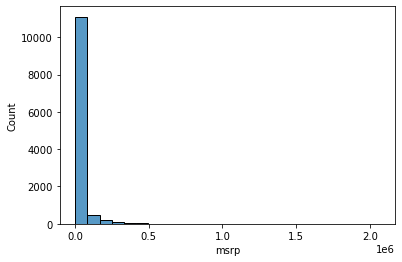

In [135]:
hist = sns.histplot(df['msrp'], bins = 25)
plt.show()

It is clear that there is a right skew in the data.
The distribution of prices isn't normal and therefore, not ideal for ML

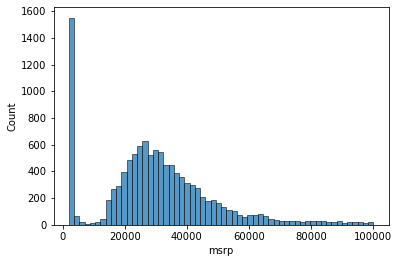

In [142]:
df_normal = df[df['msrp']<100000]
sns.histplot(df_normal['msrp'])
plt.show()

Distribution with msrp less than $100000 is more normal than the original dataset

***
Using np.log1p() to bring the scale smaller to verify normalization of data through histogram visualization

In [149]:
prices_log = np.log1p(df_normal['msrp'])

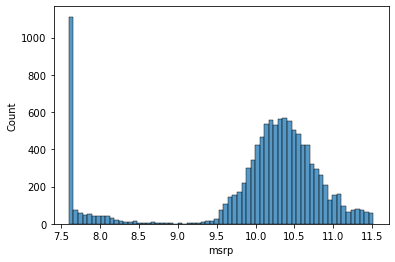

In [150]:
sns.histplot(prices_log)
plt.show()

Removing missing values

In [151]:
df_normal.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              65
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         4
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64